In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("../DataSets/clustering.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
features = ["LoanAmount","ApplicantIncome"]
X = df[features]

In [5]:
X.head()

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


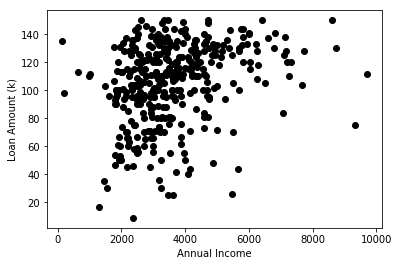

In [6]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],color="black")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (k)")
plt.show()

In [7]:
Centroid = X.sample(n=3)

In [8]:
Centroid

,LoanAmount,ApplicantIncome
277,143.0,2425
327,123.0,3074
84,25.0,3459


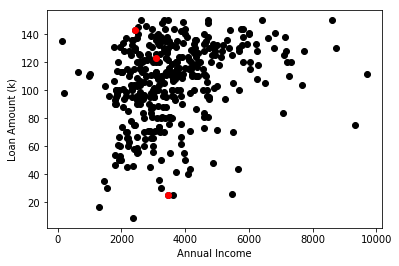

In [9]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],color="black")
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c="red")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (k)")
plt.show()

In [10]:
for index1,row_c in Centroid.iterrows():
    print(row_c)

LoanAmount          143.0
ApplicantIncome    2425.0
Name: 277, dtype: float64
LoanAmount          123.0
ApplicantIncome    3074.0
Name: 327, dtype: float64
LoanAmount           25.0
ApplicantIncome    3459.0
Name: 84, dtype: float64


In [13]:
for index1,c_rows in Centroid.iterrows():
    ED = []
    print(len(ED))
    i=1
    for index2,x_rows in X.iterrows():
        d1 = (c_rows["ApplicantIncome"] - x_rows["ApplicantIncome"])
        d2 = (c_rows["LoanAmount"] - x_rows["LoanAmount"])
        dist = np.sqrt(d1**2 + d2**2)
        ED.append(dist)
    X[i] = ED
    i+=1

0
0
0


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
print(X)

     LoanAmount  ApplicantIncome            1
0         128.0             4583  1128.709440
1          66.0             3000   460.827517
2         120.0             2583   881.136198
3         141.0             6000  2543.646398
4          95.0             2333  1128.173745
5          70.0             3200   262.880201
6         109.0             2500   962.671803
7         114.0             1853  1608.464174
8          17.0             1299  2160.014815
9         125.0             4950  1494.349691
10        100.0             3596   156.185787
11         76.0             3510    72.124892
12        133.0             4887  1432.078210
13        115.0             2600   863.701916
14        104.0             7660  4201.742734
15        116.0             2600   863.806691
16        112.0             3365   128.082005
17        122.0             2799   667.089949
18        110.0             4226   771.695536
19         35.0             1442  2017.024789
20        120.0             3750  

In [20]:
C = []
for index,row in X.iterrows():
    min_dist=row[1]
    pos=1
    for i in range(3):
        if row[i+1] < min_dist:
            min_dist = row[i+1]
            pos=i+1
    C.append(pos)

In [ ]:
print(C)

In [29]:
diff = 1
j = 0
while(diff!=0):
    XD=X
    i=1
    for index1,c_rows in Centroid.iterrows():
        ED =[]
        for index2,x_rows in X.iterrows():
            d1 = (c_rows["ApplicantIncome"] - x_rows["ApplicantIncome"])
            d2 = (c_rows["LoanAmount"] - x_rows["LoanAmount"])
            dist = np.sqrt(d1**2 + d2**2)
            ED.append(dist)
        X[i] = ED
        i+=1

    C = []
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(3):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"] = C
    new_Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
        
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (new_Centroids['LoanAmount'] - Centroid['LoanAmount']).sum() + (new_Centroids['ApplicantIncome'] - Centroid['ApplicantIncome']).sum()
        print(diff.sum())
    Centroid = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.0


In [27]:
type(Centroid["LoanAmount"])

pandas.core.series.Series

In [24]:
Centroid

,LoanAmount,ApplicantIncome
Cluster,,
1,97.472527,2497.972527
2,109.756410,4033.596154
3,119.488372,6512.767442


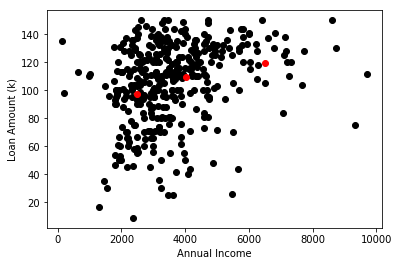

In [25]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],color="black")
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c="red")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (k)")
plt.show()

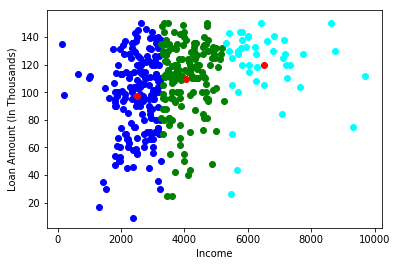

In [19]:
color=['blue','green','cyan']
for k in range(3):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroid["ApplicantIncome"],Centroid["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()